Backward Difference Result    : [3.707 3.152 3.152]
Three-Point Difference Result : [17.769705 22.193635 27.10735  32.51085 ]
Five-Point Difference Result  : [3.89934425 2.87687567 2.24970408 1.837756   1.54420992 1.35549633]


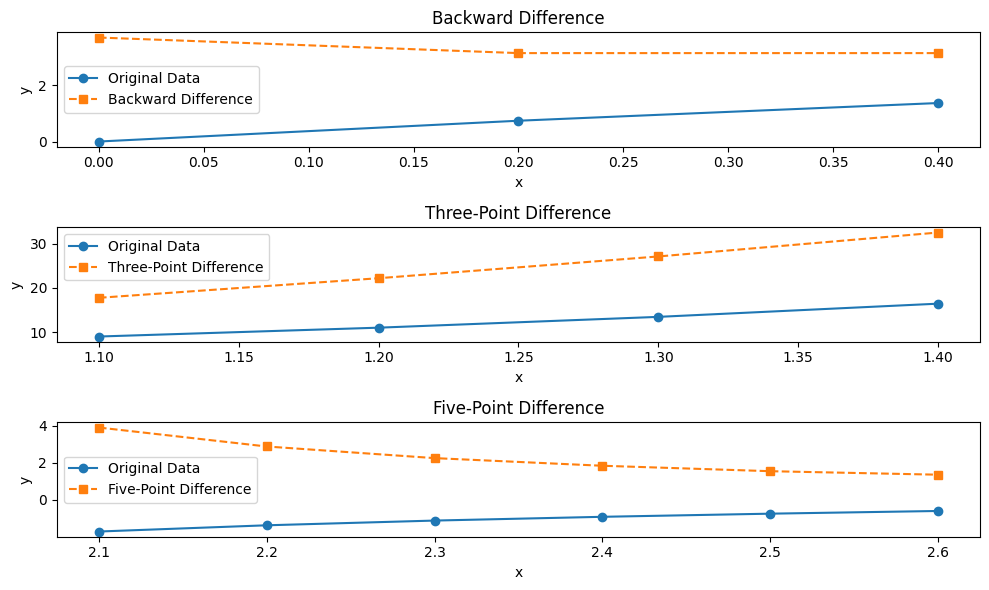

In [ ]:
"""TUGAS 1"""

import numpy as np
import matplotlib.pyplot as plt

def backward_difference(x, y):
    """Calculate the first derivative.

    All values in 'x' must be equally spaced.

    Args:
        x (numpy.ndarray): x values.
        y (numpy.ndarray): y values.

    Returns:
        dy (numpy.ndarray): the first derivative values.
    """
    if x.size < 2 or y.size < 2:
        raise ValueError("'x' and 'y' arrays must have 2 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have same size.")

    def dy_difference(h, y0, y1):
        return (y1 - y0) / h

    n = x.size
    dy = np.zeros(n)
    for i in range(0, n):
        if i == n - 1:
            hx = x[i] - x[i - 1]
            dy[i] = dy_difference(-hx, y[i], y[i - 1])
        else:
            hx = x[i + 1] - x[i]
            dy[i] = dy_difference(hx, y[i], y[i + 1])

    return dy


def three_point(x, y):
    """Calculate the first derivative.

    All values in 'x' must be equally spaced.

    Args:
        x (numpy.ndarray): x values.
        y (numpy.ndarray): y values.

    Returns:
        dy (numpy.ndarray): the first derivative values.
    """
    if x.size < 3 or y.size < 3:
        raise ValueError("'x' and 'y' arrays must have 3 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have same size.")

    def dy_mid(h, y0, y2):
        return (1 / (2 * h)) * (y2 - y0)

    def dy_end(h, y0, y1, y2):
        return (1 / (2 * h)) * (-3 * y0 + 4 * y1 - y2)

    hx = x[1] - x[0]
    n = x.size
    dy = np.zeros(n)
    for i in range(0, n):
        if i == 0:
            dy[i] = dy_end(hx, y[i], y[i + 1], y[i + 2])
        elif i == n - 1:
            dy[i] = dy_end(-hx, y[i], y[i - 1], y[i - 2])
        else:
            dy[i] = dy_mid(hx, y[i - 1], y[i + 1])

    return dy


def five_point(x, y):
    """Calculate the first derivative.

    All values in 'x' must be equally spaced.

    Args:
        x (numpy.ndarray): x values.
        y (numpy.ndarray): y values.

    Returns:
        dy (numpy.ndarray): the first derivative values.
    """
    if x.size < 6 or y.size < 6:
        raise ValueError("'x' and 'y' arrays must have 6 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have same size.")

    def dy_mid(h, y0, y1, y3, y4):
        return (1 / (12 * h)) * (y0 - 8 * y1 + 8 * y3 - y4)

    def dy_end(h, y0, y1, y2, y3, y4):
        return (1 / (12 * h)) * \
            (-25 * y0 + 48 * y1 - 36 * y2 + 16 * y3 - 3 * y4)

    hx = x[1] - x[0]
    n = x.size
    dy = np.zeros(n)
    for i in range(0, n):
        if i in (0, 1):
            dy[i] = dy_end(hx, y[i], y[i + 1], y[i + 2], y[i + 3], y[i + 4])
        elif i in (n - 1, n - 2):
            dy[i] = dy_end(-hx, y[i], y[i - 1], y[i - 2], y[i - 3], y[i - 4])
        else:
            dy[i] = dy_mid(hx, y[i - 2], y[i - 1], y[i + 1], y[i + 2])

    return dy

"""Backward Difference."""
x_backward = np.array([0.0, 0.2, 0.4])
y_backward = np.array([0.00000, 0.74140, 1.3718])

backward_diff_result = backward_difference(x_backward, y_backward)
print("Backward Difference Result    :", backward_diff_result)

"""Three-Point Difference."""
x_three_point = np.array([1.1, 1.2, 1.3, 1.4])
y_three_point = np.array([9.025013, 11.02318, 13.46374, 16.44465])

three_point_result = three_point(x_three_point, y_three_point)
print("Three-Point Difference Result :", three_point_result)

"""Five-Point Difference."""
x_five_point = np.array([2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
y_five_point = np.array([-1.709847, -1.373823, -1.119214, -0.9160143, -0.7470223, -0.6015966])

five_point_result = five_point(x_five_point, y_five_point)
print("Five-Point Difference Result  :", five_point_result)

#GRAPHIC
# Backward Difference
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(x_backward, y_backward, 'o-', label='Original Data')
plt.plot(x_backward, backward_diff_result, 's--', label='Backward Difference')
plt.title('Backward Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Three-Point Difference
plt.subplot(3, 1, 2)
plt.plot(x_three_point, y_three_point, 'o-', label='Original Data')
plt.plot(x_three_point, three_point_result, 's--', label='Three-Point Difference')
plt.title('Three-Point Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Five-Point Difference
plt.subplot(3, 1, 3)
plt.plot(x_five_point, y_five_point, 'o-', label='Original Data')
plt.plot(x_five_point, five_point_result, 's--', label='Five-Point Difference')
plt.title('Five-Point Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Input values:
x: 0.0, y: 0.0
x: 0.2, y: 0.7414
x: 0.4, y: 1.3718
Euler method results:
x: 0.0, y: 0.0
x: 0.1, y: 0.0
x: 0.30000000000000004, y: 1.4086599999999998


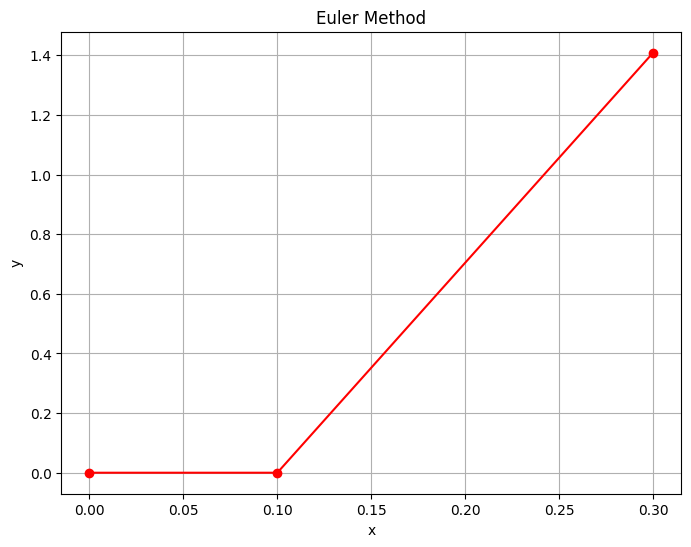

In [ ]:
#TUGAS 2 Function to perform Euler Method
def euler_method(x, y, dx, p0, p2, p6):
    results = [(x[0], y[0])]
    for i in range(1, len(x)):
        h = dx
        x_end = x[i-1] + h
        if x_end > x[i]:
            x_end = x[i]

        y_value = y[i-1]

        while x[i-1] < x_end:
            y_value = y_value + h * (p0 * y_value + p2 * y_value*2 + p6 * y_value*6)
            x[i-1] = x[i-1] + h
            results.append((x[i-1], y_value))

    return results


x = [0.0, 0.2, 0.4]
y = [0.00000, 0.74140, 1.3718]


print("Input values:")
for xi, yi in zip(x, y):
    print(f"x: {xi}, y: {yi}")


p0_coefficient = 1.0
p2_coefficient = 1.0
p6_coefficient = 1.0
results = euler_method(x, y, dx=0.1, p0=p0_coefficient, p2=p2_coefficient, p6=p6_coefficient)
x_results, y_results = zip(*results)

print("Euler method results:")
for xi, yi in zip(x_results, y_results):
    print(f"x: {xi}, y: {yi}")

plt.figure(figsize=(8, 6))
plt.plot(x_results, y_results, marker='o', linestyle='-', color='r')
plt.title("Euler Method")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Input values:
x: 1.1, y: 9.025013
x: 1.2, y: 11.02318
x: 1.3, y: 13.46374
x: 1.4, y: 16.44465
Heun's Method results:
dy_dx: 149.49518425527253
dy_dx: 222.66111154157355
dy_dx: 338.00063298779287


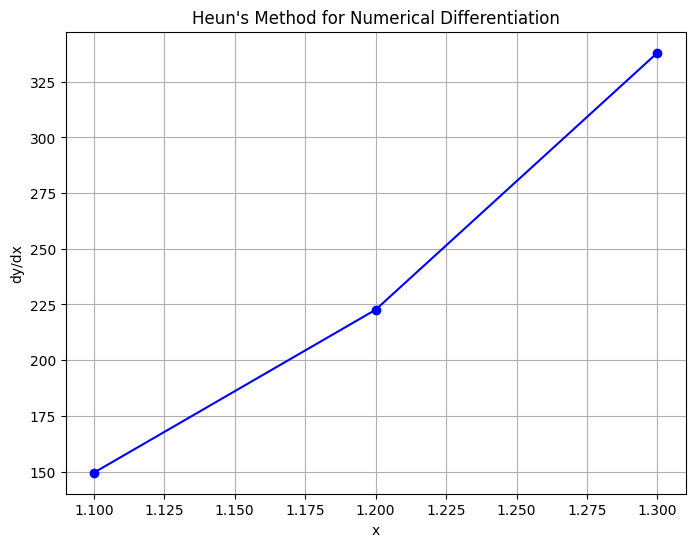

In [ ]:
#TUGAS 2 Heun's Method
import matplotlib.pyplot as plt

def heuns_method(x, y):
    h = x[1] - x[0]
    dy_dx = []

    for i in range(len(x) - 1):
        y_predictor = y[i] + h * numerical_derivative(y[i], x[i])
        y_corrector = y[i] + (h / 2) * (numerical_derivative(y[i], x[i]) + numerical_derivative(y_predictor, x[i+1]))

        dy_dx.append((y_corrector - y[i]) / h)

    return dy_dx

def numerical_derivative(y, x):
    return (y**2) / x

x_data = [1.1, 1.2, 1.3, 1.4]
y_data = [9.025013, 11.02318, 13.46374, 16.44465]

print("Input values:")
for xi, yi in zip(x_data, y_data):
    print(f"x: {xi}, y: {yi}")
dy_dx_result = heuns_method(x_data, y_data)

print("Heun's Method results:")
for dy_dx_val in dy_dx_result:
    print(f"dy_dx: {dy_dx_val}")

plt.figure(figsize=(8, 6))
plt.plot(x_data[:-1], dy_dx_result, marker='o', linestyle='-', color='b')
plt.title("Heun's Method for Numerical Differentiation")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.grid(True)
plt.show()

Input values:
x: 2.1, y: -1.709847
x: 2.2, y: -1.373823
x: 2.3, y: -1.119214
x: 2.4, y: -0.9160143
x: 2.5, y: -0.7470223
x: 2.6, y: -0.6015966
Fourth-Order Runge-Kutta Method results:
dy_dx: -15.838631545226633
dy_dx: -14.796851471288903
dy_dx: -13.920227374033127
dy_dx: -13.171741168377517
dy_dx: -12.5247082942806


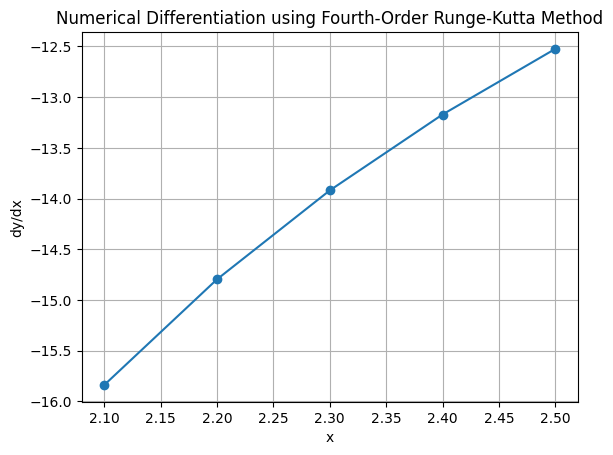

In [ ]:
#TUGAS 2 Fourth-Order Runge-Kutta Method
import matplotlib.pyplot as plt

def runge_kutta_method(x, y, h):
    dy_dx = []

    for i in range(len(x) - 1):
        k1 = h * numerical_derivative(y[i], x[i])
        k2 = h * numerical_derivative(y[i] + k1 / 2, x[i] + h / 2)
        k3 = h * numerical_derivative(y[i] + k2 / 2, x[i] + h / 2)
        k4 = h * numerical_derivative(y[i] + k3, x[i] + h)
        y[i+1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        dy_dx.append(y[i+1] / h)
    return dy_dx

def numerical_derivative(y, x):
    return (y**2) / x

x_data = [2.1, 2.2, 2.3, 2.4, 2.5, 2.6]
y_data = [-1.709847, -1.373823, -1.119214, -0.9160143, -0.7470223, -0.6015966]

print("Input values:")
for xi, yi in zip(x_data, y_data):
    print(f"x: {xi}, y: {yi}")
h = x_data[1] - x_data[0]
dy_dx_result = runge_kutta_method(x_data, y_data, h)

print("Fourth-Order Runge-Kutta Method results:")
for dy_dx_val in dy_dx_result:
    print(f"dy_dx: {dy_dx_val}")

plt.plot(x_data[:-1], dy_dx_result, marker='o', linestyle='-')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.title('Numerical Differentiation using Fourth-Order Runge-Kutta Method')
plt.grid(True)
plt.show()

x: 0.0, y: 1.0
x: 0.2, y: 1.1051708333333334
x: 0.6000000000000001, y: 1.3498556558333334
x: 1.0, y: 1.6487136980348336


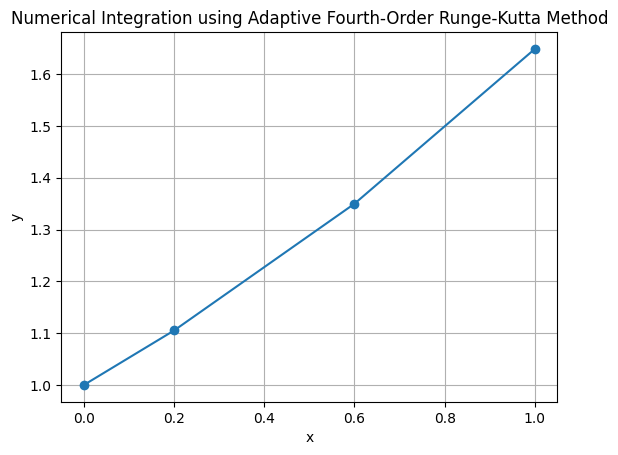

In [ ]:
#TUGAS 2 Driver & adaptive runge-kutta method
import matplotlib.pyplot as plt

def f(x, y):
    return y

def runge_kutta_order_4(x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)

    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def driver_method(x_start, x_end, y_start, h_initial, tolerance):
    x = x_start
    y = y_start
    h = h_initial

    results = [(x, y)]

    while x < x_end:
        while True:
            y1 = runge_kutta_order_4(x, y, h)
            y2_step1 = runge_kutta_order_4(x, y, h/2)
            y2_step2 = runge_kutta_order_4(x + h/2, y2_step1, h/2)
            error = abs(y2_step2 - y1)

            if error < tolerance:
                break

            h = h / 2

        h = min(2 * h, x_end - x)

        x = x + h
        y = y1

        results.append((x, y))

    return results

x_start = 0.0
x_end = 1.0
y_start = 1.0
h_initial = 0.1
tolerance = 1e-5

results = driver_method(x_start, x_end, y_start, h_initial, tolerance)

for x, y in results:
    print(f"x: {x}, y: {y}")

x_values = [result[0] for result in results]
y_values = [result[1] for result in results]

plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Integration using Adaptive Fourth-Order Runge-Kutta Method')
plt.grid(True)
plt.show()